Customer Segmentation and Decision Making

## Load data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [3]:
# Load dataset
df_data = pd.read_csv("C:\\Business Intelligence - Digital Skola\\Tugas\\machine learning\\Customer Segmentation and Decision Making with Machine Learning\\transactions.csv")

## Cek data

In [4]:
df_data.info()
df_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [5]:
df_data.columns.tolist()

['accountNumber',
 'customerId',
 'creditLimit',
 'availableMoney',
 'transactionDateTime',
 'transactionAmount',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'isFraud',
 'currentBalance',
 'cardPresent',
 'expirationDateKeyInMatch']

In [6]:
df_data['customerId'].nunique()

5000

In [7]:
df_data.shape

(641914, 23)

## Analisis deskriptif

In [8]:
df_data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,638569.000000,641627.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,9.136460,3.238367,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,16.961185,9.680862,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


In [9]:
df_data.describe(include='object')

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
count,641914,641914,638001,641290,641914,641914,641914,641914,641325
unique,635472,2493,4,4,19,165,1826,2186,3
top,2016-11-01T09:09:27,Lyft,US,US,online_retail,1/5/2026,11/12/2015,20/7/2016,PURCHASE
freq,3,25311,632303,635577,161469,4209,10137,3948,608685


In [10]:
df_data['merchantCountryCode'].unique()

array(['US', 'PR', 'MEX', nan, 'CAN'], dtype=object)

In [11]:
df_data.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
isFraud                        bool
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
dtype: object

# Explorasi Data Analysis

## 1. Uvariate Anlaysis

In [12]:
sns.set_color_codes("pastel")
sns.set_style("whitegrid")

### transactionAmount

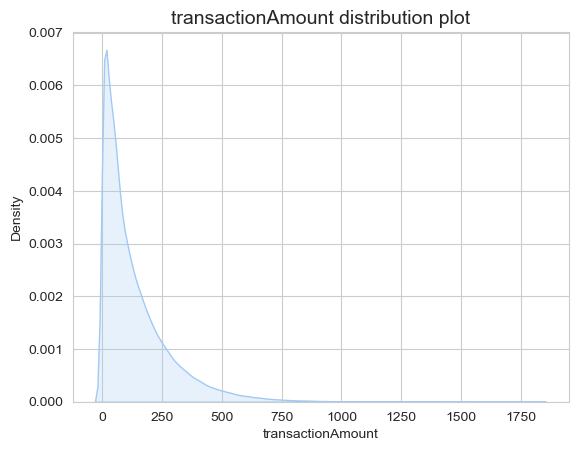

In [13]:
sns.kdeplot(data=df_data, x='transactionAmount', fill=True, color='b')
plt.title('transactionAmount distribution plot', fontsize=14)
plt.xlabel("transactionAmount")
plt.ylabel("Density")
plt.show()

Key takeaway:
1. Sebagian besar konsumen dengan transactionAmount $0 - $250
2. distribusi miring ke kanan, lebih banyak customer yang transation amount rendah
3. customer menurun setelah transation amount 250

### merchant category

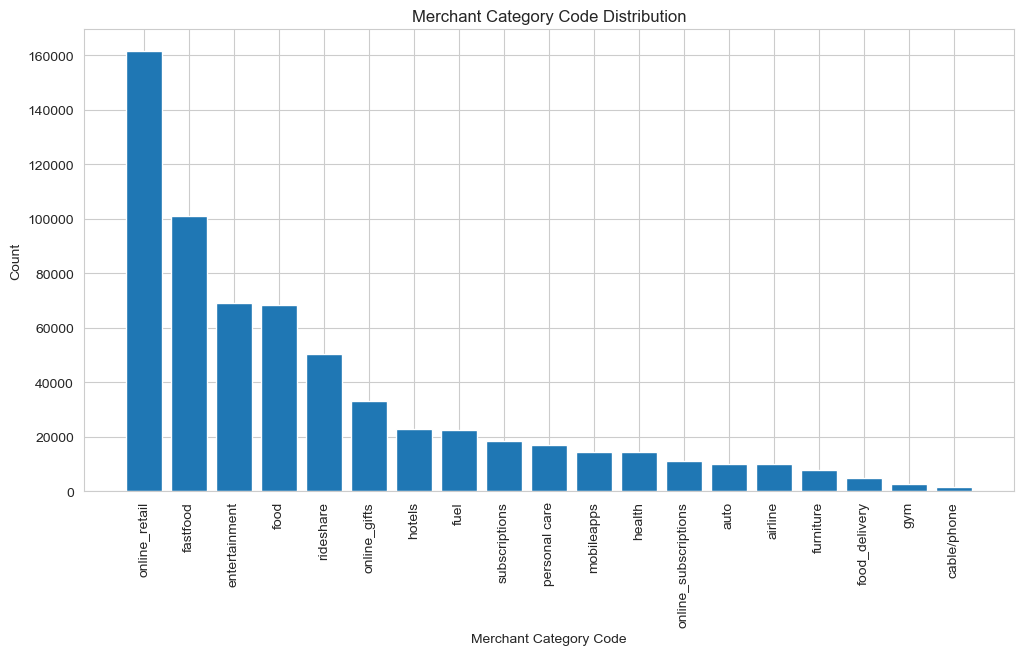

In [14]:
category_counts = df_data['merchantCategoryCode'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.title('Merchant Category Code Distribution')
plt.xlabel('Merchant Category Code')
plt.ylabel('Count')
plt.show()

key insight :
1. Jumlah merchant category tertinggi adalah online retail
2. Jumlah merchant category terendah adalah cable/phone

### Merchant Country Code

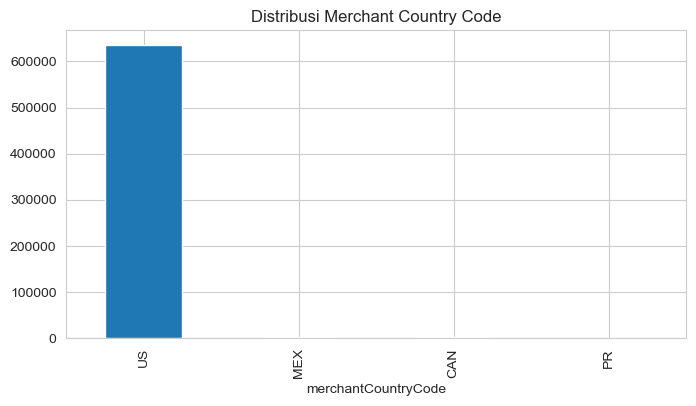

In [15]:
plt.figure(figsize=(8,4))
df_data["merchantCountryCode"].value_counts().plot(kind="bar")
plt.title("Distribusi Merchant Country Code")
plt.show()

Key takeway:
1. Konsumen didominasi oleh country  US

### Available money

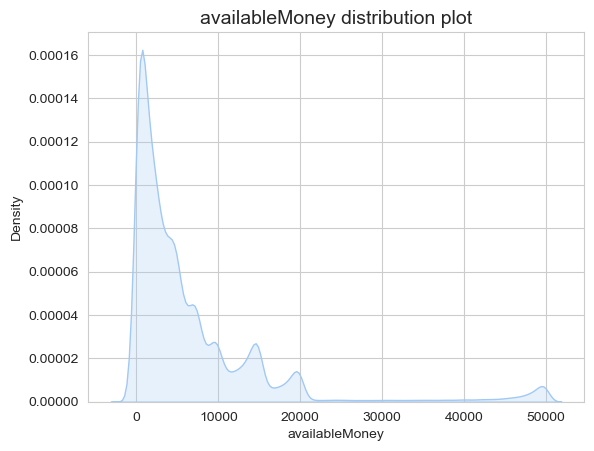

In [16]:
sns.kdeplot(data=df_data, x='availableMoney', fill=True, color='b')
plt.title('availableMoney distribution plot', fontsize=14)
plt.show()

### Curent Balance

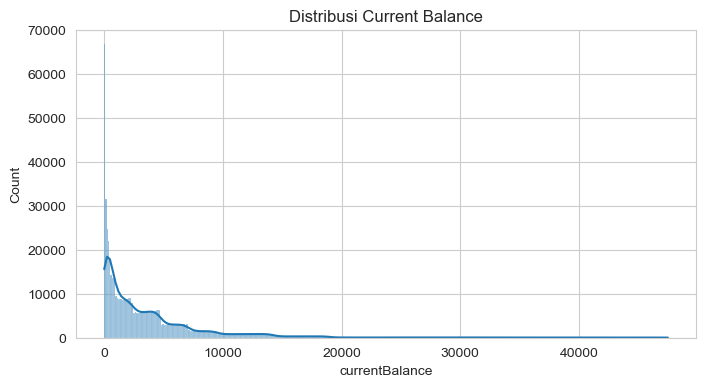

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df_data["currentBalance"], kde=True)
plt.title("Distribusi Current Balance")
plt.show()

### CreditLLimmit

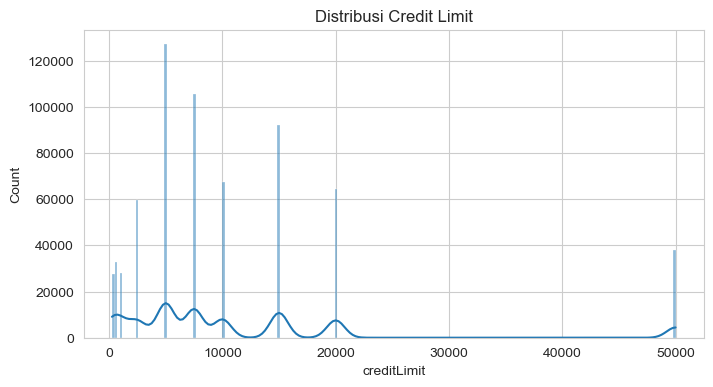

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(df_data["creditLimit"], kde=True)
plt.title("Distribusi Credit Limit")
plt.show()


### trasactionType

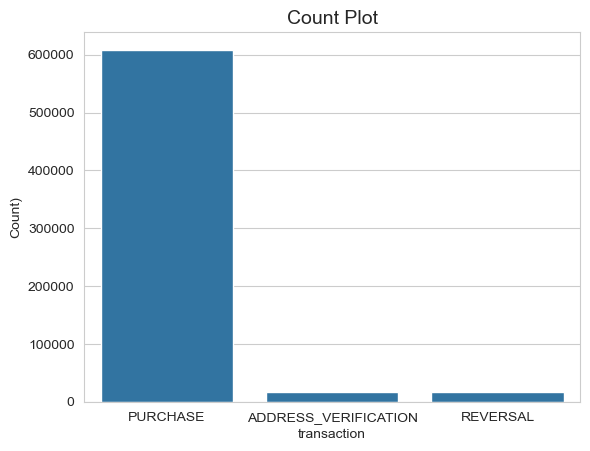

In [19]:
sns.countplot(x=df_data["transactionType"])
plt.title("Count Plot", fontsize="14")
plt.xlabel("transaction")
plt.ylabel("Count)")
plt.show()

### Merchant Name

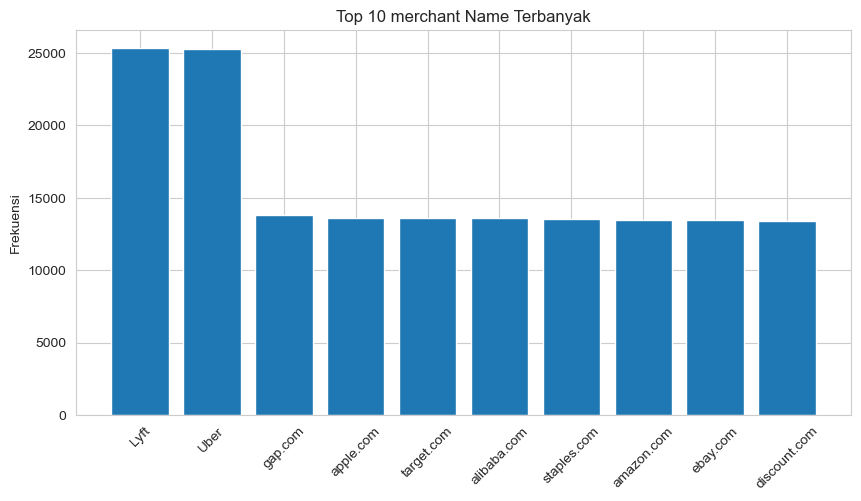

In [20]:
import matplotlib.pyplot as plt

top10 = df_data['merchantName'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 merchant Name Terbanyak")
plt.ylabel("Frekuensi")
plt.show()


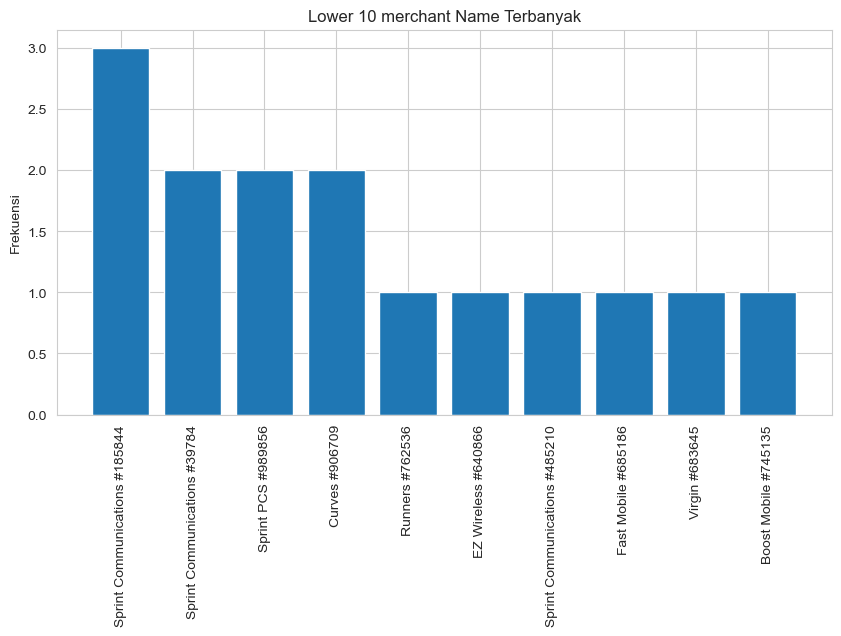

In [21]:
lower10 = df_data['merchantName'].value_counts().tail(10)

plt.figure(figsize=(10,5))
plt.bar(lower10.index, lower10.values)
plt.xticks(rotation=90)
plt.title("Lower 10 merchant Name Terbanyak")
plt.ylabel("Frekuensi")
plt.show()


## 2. Bivariate

a) average amount per country

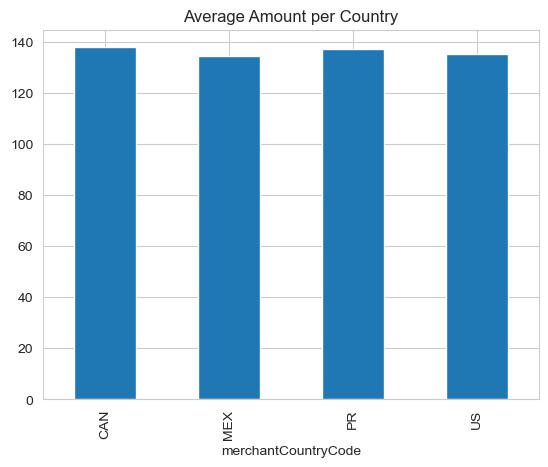

In [22]:
df_test = df_data.groupby("merchantCountryCode")["transactionAmount"].mean().plot(kind="bar")
plt.title("Average Amount per Country")
plt.show()


b) total amount by merchant categories

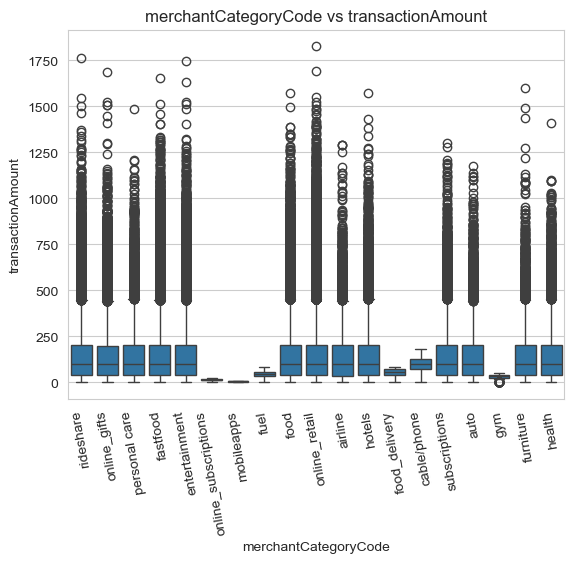

In [23]:
sns.boxplot(x="merchantCategoryCode", y="transactionAmount", data=df_data)
plt.title("merchantCategoryCode vs transactionAmount")
plt.xticks(rotation=100)
plt.show()


## 3. Multivariate

a) correlation 

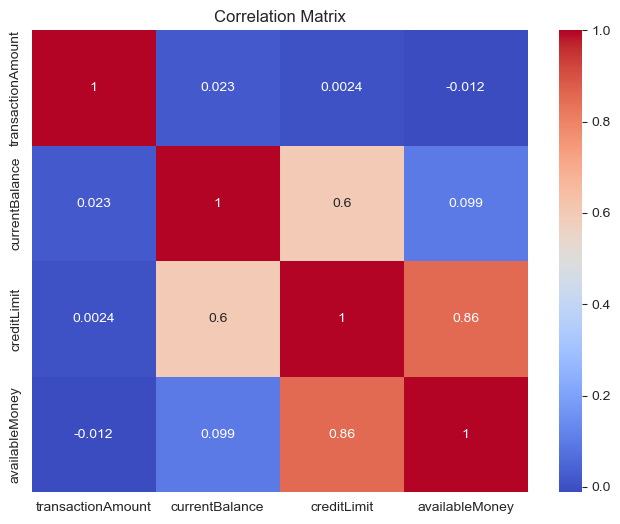

In [24]:
numeric_cols = ["transactionAmount", "currentBalance", "creditLimit", "availableMoney"]

plt.figure(figsize=(8,6))
sns.heatmap(df_data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


b) sebaran data antar beberapa variabel numerik

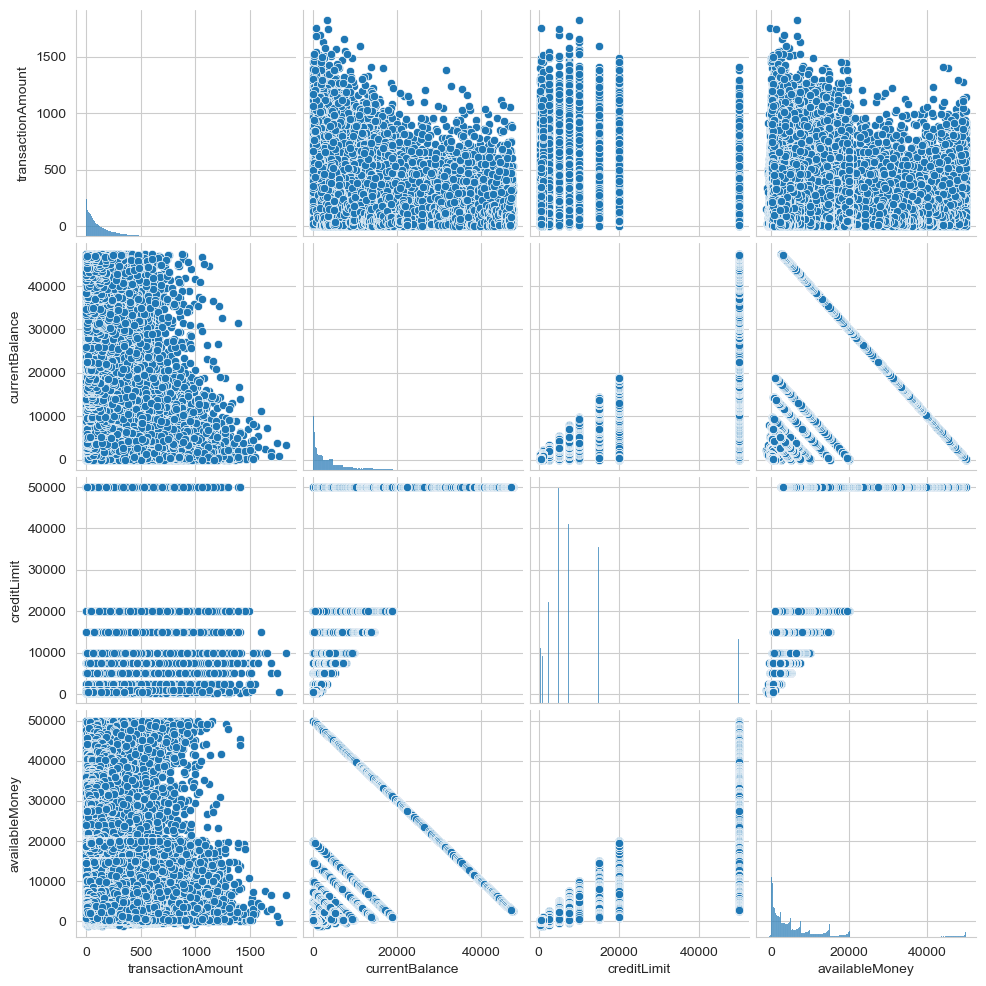

In [25]:
sns.pairplot(df_data[numeric_cols])
plt.show()

# Data Transformation

## 1. Ambil variabel penting

In [26]:
important_cols = [
   'transactionAmount',
    'merchantCountryCode',
    'availableMoney',
    'currentBalance',
    'creditLimit',
]

df_clean = df_data[important_cols].copy()

## 2. handling Missing Value

In [27]:
df_clean.isnull().sum()

transactionAmount        0
merchantCountryCode    624
availableMoney           0
currentBalance           0
creditLimit              0
dtype: int64

In [28]:
df_clean.dtypes

transactionAmount      float64
merchantCountryCode     object
availableMoney         float64
currentBalance         float64
creditLimit              int64
dtype: object

In [29]:
# Numerical
num_cols = ['transactionAmount', 'availableMoney', 'currentBalance', 'creditLimit']

# Categorical
cat_cols = ['merchantCountryCode']
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

C:\Users\Rian\AppData\Local\Temp\ipykernel_6060\1479448840.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


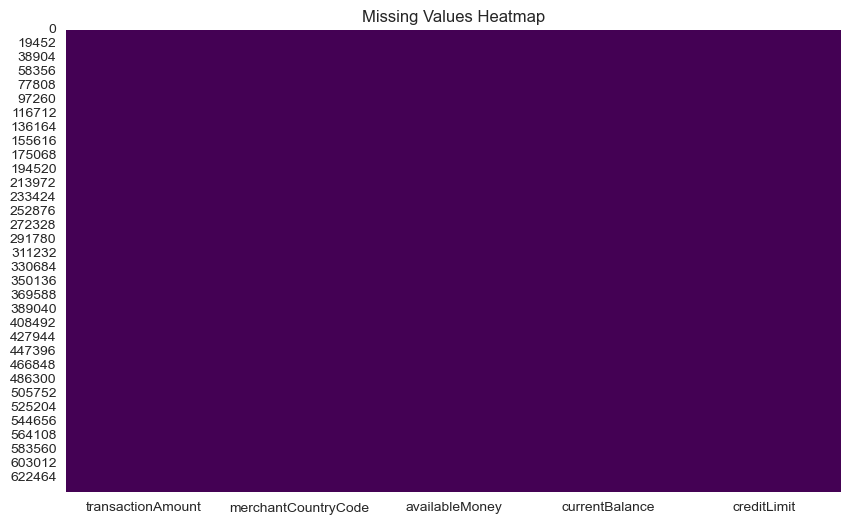

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 3. Handling Outlier

### a) Cek Outlier

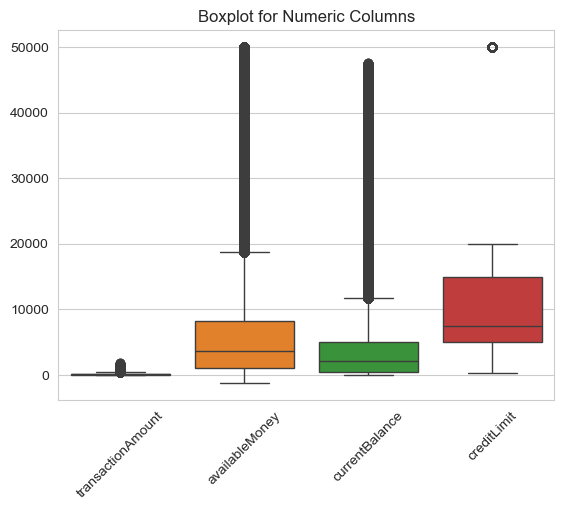

In [31]:
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

### b) Statistik data

In [32]:
df_clean.describe()

,transactionAmount,availableMoney,currentBalance,creditLimit
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,135.162497,6652.828573,4044.382035,10697.210608
std,147.053302,9227.132275,5945.510224,11460.359133
min,0.000000,-1244.930000,0.000000,250.000000
25%,32.320000,1114.970000,502.442500,5000.000000
50%,85.800000,3578.165000,2151.860000,7500.000000
75%,189.030000,8169.185000,5005.890000,15000.000000
max,1825.250000,50000.000000,47496.500000,50000.000000


### c) Handling outlier dengan iqr

In [33]:
q1_availableMoney = 1115
q2_availableMoney = 3578
q3_availableMoney = 8169

q1_transactionAmount = 32
q2_transactionAmount = 86
q3_transactionAmount = 189

q1_currentBalance = 502
q2_currentBalance = 2152
q3_currentBalance = 5006

q1_creditLimit = 5000
q2_creditLimit = 7500
q3_creditLimit = 15000

In [34]:
iqr_availableMoney = q3_availableMoney - q1_availableMoney
iqr_transactionAmount = q3_transactionAmount - q1_transactionAmount
iqr_currentBalance = q3_currentBalance - q1_currentBalance
iqr_creditLimit = q3_creditLimit - q1_creditLimit

In [35]:
lower_bound_availableMoney = q3_availableMoney - (1.5 * iqr_availableMoney)
upper_bound_availableMoney = q3_availableMoney + (1.5 * iqr_availableMoney)

lower_bound_transactionAmount = q3_transactionAmount - (1.5 * iqr_transactionAmount)
upper_bound_transactionAmount = q3_transactionAmount + (1.5 * iqr_transactionAmount)

lower_bound_currentBalance = q3_currentBalance - (1.5 * iqr_currentBalance)
upper_bound_currentBalance = q3_currentBalance + (1.5 * iqr_currentBalance)

lower_bound_creditLimit = q3_creditLimit - (1.5 * iqr_creditLimit)
upper_bound_creditLimit = q3_creditLimit + (1.5 * iqr_creditLimit)

print('lower bound availableMoney:', lower_bound_availableMoney)
print('upper bound availableMoney:', upper_bound_availableMoney)
print('lower bound transactionAmount:', lower_bound_transactionAmount)
print('upper bound transactionAmount:', upper_bound_transactionAmount)
print('lower bound currentBalance:', lower_bound_currentBalance)
print('upper bound currentBalance:', upper_bound_currentBalance)
print('lower bound creditLimit:', lower_bound_creditLimit)
print('upper bound creditLimit:', upper_bound_creditLimit)

lower bound availableMoney: -2412.0
upper bound availableMoney: 18750.0
lower bound transactionAmount: -46.5
upper bound transactionAmount: 424.5
lower bound currentBalance: -1750.0
upper bound currentBalance: 11762.0
lower bound creditLimit: 0.0
upper bound creditLimit: 30000.0


In [36]:
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)
    return df

df_capped = cap_outliers(df_clean.copy(), numeric_cols)  # dataframe baru


### d) visualisasi handling outlier

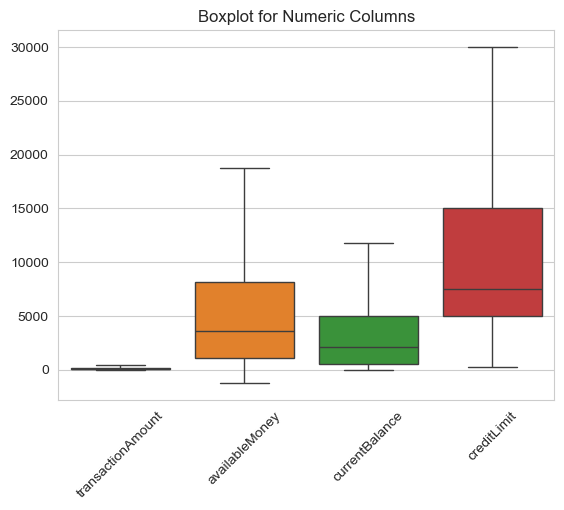

In [37]:
sns.boxplot(data=df_capped)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

# 4. Scaling Data

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_capped[numeric_cols])

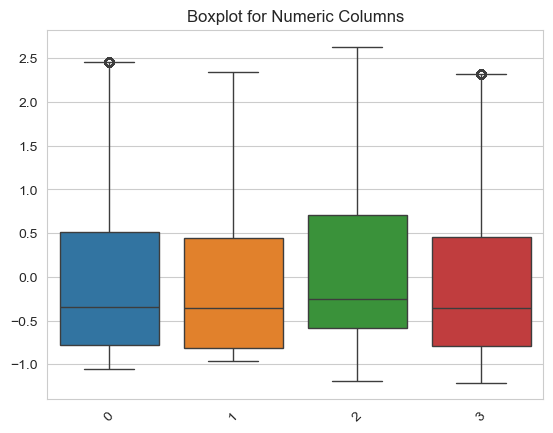

In [39]:
sns.boxplot(data=X_scaled)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

Setelah handling outlier, penggunaan StandardScaler menghasilkan distribusi fitur yang seimbang (mean mendekati 0 dan variansi seragam), sehingga sesuai untuk algoritma clustering

# 5. Data Prepocessing

In [40]:
df_capped

,transactionAmount,merchantCountryCode,availableMoney,currentBalance,creditLimit
0,111.33,US,5000.00,0.00,5000
1,24.75,US,4888.67,111.33,5000
2,187.40,US,4863.92,136.08,5000
3,227.34,US,4676.52,323.48,5000
4,0.00,US,4449.18,550.82,5000
...,...,...,...,...,...
641909,5.37,US,2574.02,4925.98,7500
641910,223.70,US,2568.65,4931.35,7500
641911,138.42,US,2344.95,5155.05,7500
641912,16.31,US,2206.53,5293.47,7500


In [41]:
df_ohe = pd.get_dummies(df_capped, columns=['merchantCountryCode'], prefix='country')

In [42]:
df_ohe.head()

,transactionAmount,availableMoney,currentBalance,creditLimit,country_CAN,country_MEX,country_PR,country_US
0,111.33,5000.00,0.00,5000,False,False,False,True
1,24.75,4888.67,111.33,5000,False,False,False,True
2,187.40,4863.92,136.08,5000,False,False,False,True
3,227.34,4676.52,323.48,5000,False,False,False,True
4,0.00,4449.18,550.82,5000,False,False,False,True


# 6. K-means Clustering

In [43]:
df_ohe.describe()

,transactionAmount,availableMoney,currentBalance,creditLimit
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,127.272291,5612.716988,3416.774897,9512.036270
std,121.011254,5671.681338,3565.206161,7776.712339
min,0.000000,-1244.930000,0.000000,250.000000
25%,32.320000,1114.970000,502.442500,5000.000000
50%,85.800000,3578.165000,2151.860000,7500.000000
75%,189.030000,8169.185000,5005.890000,15000.000000
max,424.095000,18750.507500,11761.061250,30000.000000


### a) elbow method

In [44]:
inertia_values = []
k_ranges = range(1, 11)

for k in k_ranges:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(df_ohe)
  inertia_values.append(kmeans.inertia_)

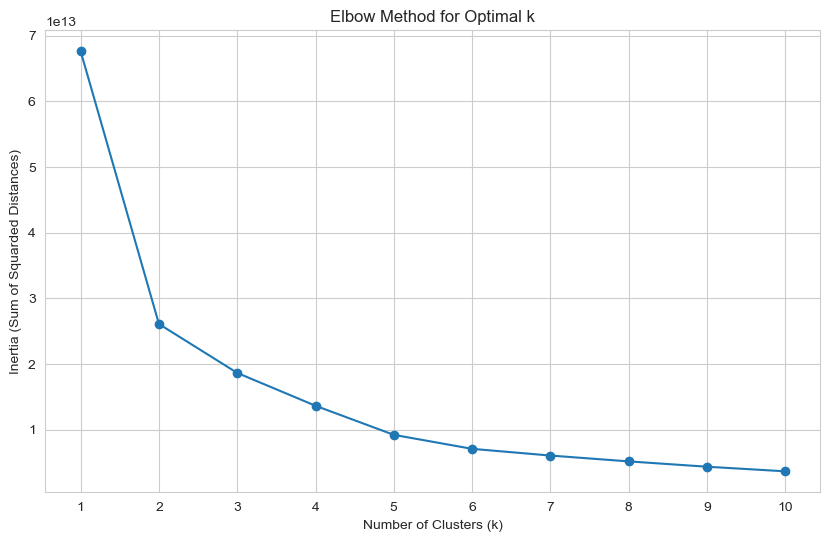

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(k_ranges, inertia_values, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squarded Distances)')
plt.xticks(k_ranges)
plt.grid(True)
plt.show()

### b) Clustering

In [46]:
#pemilihan k=2 dari grafik elbow
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans_label = kmeans.fit_predict(df_ohe)

In [47]:
df_ohe["cluster"] = kmeans_label

In [48]:
df_ohe.tail()

,transactionAmount,availableMoney,currentBalance,creditLimit,country_CAN,country_MEX,country_PR,country_US,cluster
641909,5.37,2574.02,4925.98,7500,False,False,False,True,0
641910,223.70,2568.65,4931.35,7500,False,False,False,True,0
641911,138.42,2344.95,5155.05,7500,False,False,False,True,0
641912,16.31,2206.53,5293.47,7500,False,False,False,True,0
641913,32.53,2190.22,5309.78,7500,False,False,False,True,0


In [49]:
kmeans_label

array([0, 0, 0, ..., 0, 0, 0], shape=(641914,), dtype=int32)

In [50]:
pd.Series(kmeans_label).value_counts()

0    447632
1    194282
Name: count, dtype: int64

### c) Visualisasi

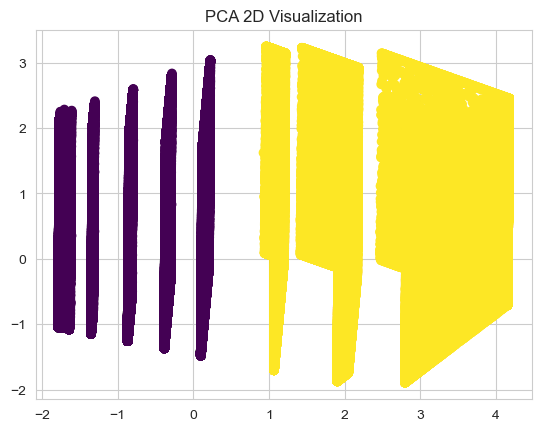

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled)

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=kmeans_label, cmap='viridis')
plt.title("PCA 2D Visualization")
plt.show()

Visualisasi hasil clustering dapat menggunakan metode TSNE untuk visualisasi yang lebih bagus (karena dataset besar metode ini akan memakan waktu yang cukup lama)

In [52]:
# tsne = TSNE(n_components=2, random_state=42, perplexity=20)
# # X_2d = tsne.fit_transform(df_ohe)

In [53]:
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_label, cmap="viridis")
# plt.title("Clusters with t-SNE")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# plt.legend(*scatter.legend_elements(), title="Cluster")
# plt.grid(True)
# plt.show()

### d) Dimentionality Reduction

In [54]:
df_ohe["cluster"].value_counts()


cluster
0    447632
1    194282
Name: count, dtype: int64

In [55]:
df_analysis = df_ohe.groupby("cluster").mean()
df_analysis

,transactionAmount,availableMoney,currentBalance,creditLimit,country_CAN,country_MEX,country_PR,country_US
cluster,,,,,,,,
0,127.205951,2834.833182,2302.331386,5137.164568,0.002913,0.004157,0.001939,0.990990
1,127.425141,12013.050955,5984.488724,19591.881904,0.002934,0.003989,0.001724,0.991353


Cluster Criteria :        
1. cluster 0 = Transaksi sedang, saldo rendah, dan credit limit rendah
2. cluster 1 = Transaksi besar, saldo sangat tinggi, dam credit limit tinggi

### e) labeling hasil clustering

In [56]:
# Membuat mapping label untuk setiap cluster
cluster_labels = {
    0: "Low-Value Customers",      # Transaksi sedang, saldo rendah, limit rendah
    1: "High-Value Customers"       # Transaksi besar, saldo sangat tinggi
}

# Menambahkan kolom label ke dataframe
df_ohe["cluster_label"] = df_ohe["cluster"].map(cluster_labels)

# Menampilkan distribusi cluster dengan label
print("Distribusi Cluster:")
print(df_ohe["cluster_label"].value_counts())
print("\n")

# Menampilkan sample data dengan cluster dan label
print("Sample Data dengan Cluster Label:")
print(df_ohe[["transactionAmount", "currentBalance", "creditLimit", "cluster", "cluster_label"]].head(10))

Distribusi Cluster:
cluster_label
Low-Value Customers     447632
High-Value Customers    194282
Name: count, dtype: int64


Sample Data dengan Cluster Label:
   transactionAmount  currentBalance  creditLimit  cluster  \
0             111.33            0.00         5000        0   
1              24.75          111.33         5000        0   
2             187.40          136.08         5000        0   
3             227.34          323.48         5000        0   
4               0.00          550.82         5000        0   
5               9.80          550.82         5000        0   
6             247.99          560.62         5000        0   
7               0.00          808.61         5000        0   
8              11.54          808.61         5000        0   
9              11.54          820.15         5000        0   

         cluster_label  
0  Low-Value Customers  
1  Low-Value Customers  
2  Low-Value Customers  
3  Low-Value Customers  
4  Low-Value Customers  
5  Low-Va

Ringkasan Karakteristik Cluster:
                      transactionAmount  currentBalance  creditLimit  \
cluster_label                                                          
High-Value Customers             127.43         5984.49     19591.88   
Low-Value Customers              127.21         2302.33      5137.16   

                      availableMoney  
cluster_label                         
High-Value Customers        12013.05  
Low-Value Customers          2834.83  




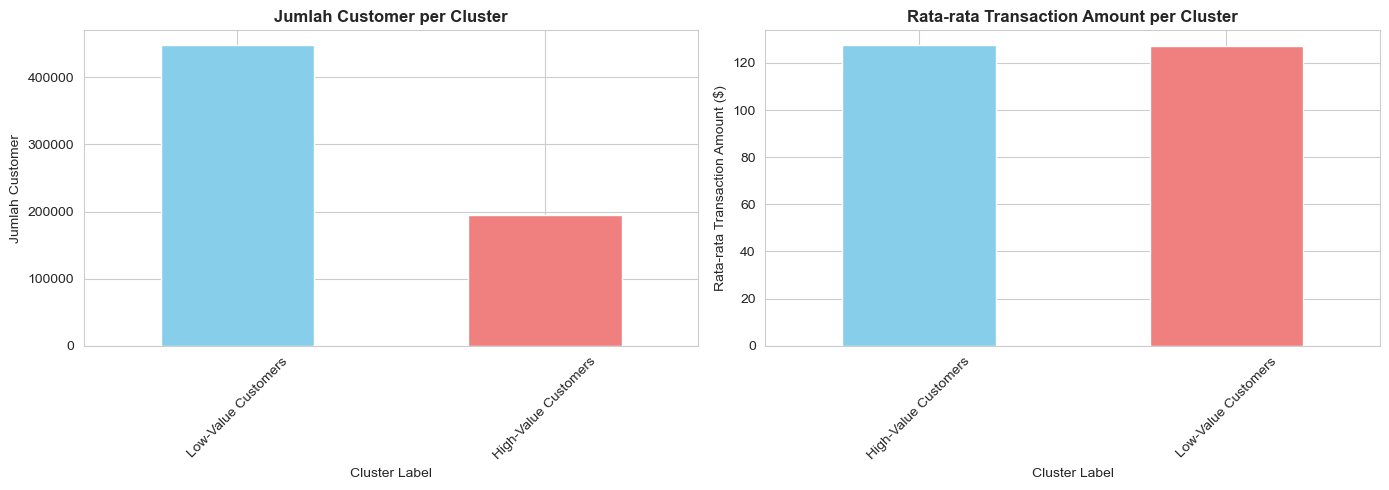

In [57]:
# Ringkasan karakteristik setiap cluster
cluster_summary = df_ohe.groupby("cluster_label").agg({
    "transactionAmount": "mean",
    "currentBalance": "mean",
    "creditLimit": "mean",
    "availableMoney": "mean"
}).round(2)

print("Ringkasan Karakteristik Cluster:")
print(cluster_summary)
print("\n")

# Visualisasi perbandingan cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Jumlah customer per cluster
df_ohe["cluster_label"].value_counts().plot(kind="bar", ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title("Jumlah Customer per Cluster", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Cluster Label")
axes[0].set_ylabel("Jumlah Customer")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Rata-rata transaction amount per cluster
cluster_summary["transactionAmount"].plot(kind="bar", ax=axes[1], color=['skyblue', 'lightcoral'])
axes[1].set_title("Rata-rata Transaction Amount per Cluster", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Cluster Label")
axes[1].set_ylabel("Rata-rata Transaction Amount ($)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Cluster Criteria / customer segmentation :        
1. Low-Value Customer = Transaksi sedang, saldo rendah, dan credit limit rendah
2. High-value customer = Transaksi besar, saldo sangat tinggi, dam credit limit tinggi

## f) Visualisasi Karakteristik Cluster

In [58]:
import numpy as np
from matplotlib.patches import Rectangle

# Persiapan data untuk visualisasi
cluster_metrics = df_ohe.groupby("cluster_label").agg({
    "transactionAmount": ["mean", "std", "min", "max"],
    "currentBalance": ["mean", "std", "min", "max"],
    "creditLimit": ["mean", "std", "min", "max"],
    "availableMoney": ["mean", "std", "min", "max"]
}).round(2)

print("Metrik Lengkap per Cluster:")
print(cluster_metrics)


Metrik Lengkap per Cluster:
                     transactionAmount                     currentBalance  \
                                  mean     std  min    max           mean   
cluster_label                                                               
High-Value Customers            127.43  120.89  0.0  424.1        5984.49   
Low-Value Customers             127.21  121.06  0.0  424.1        2302.33   

                                             creditLimit                  \
                          std  min       max        mean      std    min   
cluster_label                                                              
High-Value Customers  4582.31  0.0  11761.06    19591.88  5589.55  15000   
Low-Value Customers   2238.41  0.0   9766.30     5137.16  3150.86    250   

                            availableMoney                              
                        max           mean      std      min       max  
cluster_label                                              

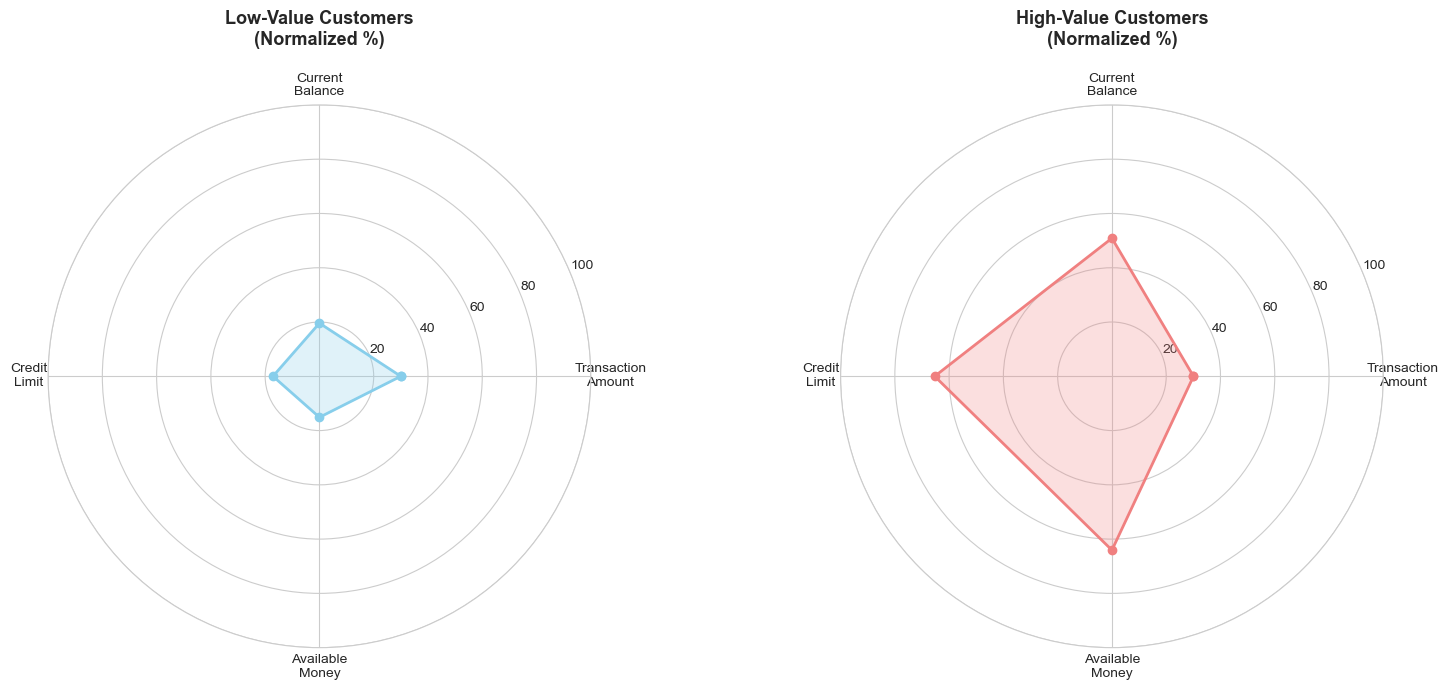

In [59]:
# Visualisasi Radar Chart untuk perbandingan karakteristik cluster
from math import pi

fig, axes = plt.subplots(1, 2, figsize=(16, 7), subplot_kw=dict(projection='polar'))

# Data untuk radar chart
metrics = ['Transaction\nAmount', 'Current\nBalance', 'Credit\nLimit', 'Available\nMoney']
cluster_order = ["Low-Value Customers", "High-Value Customers"]

# Normalisasi data untuk better visualization
normalized_data = {}
for metric in ["transactionAmount", "currentBalance", "creditLimit", "availableMoney"]:
    max_val = df_ohe[metric].max()
    normalized_data[metric] = (df_ohe.groupby("cluster_label")[metric].mean() / max_val * 100).round(2)

angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]

colors = ['skyblue', 'lightcoral']

for idx, (ax, label) in enumerate(zip(axes, cluster_order)):
    values = [
        normalized_data["transactionAmount"][label],
        normalized_data["currentBalance"][label],
        normalized_data["creditLimit"][label],
        normalized_data["availableMoney"][label]
    ]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, color=colors[idx], label=label)
    ax.fill(angles, values, alpha=0.25, color=colors[idx])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, size=10)
    ax.set_ylim(0, 100)
    ax.set_title(f"{label}\n(Normalized %)", size=13, fontweight='bold', pad=20)
    ax.grid(True)

plt.tight_layout()
plt.show()


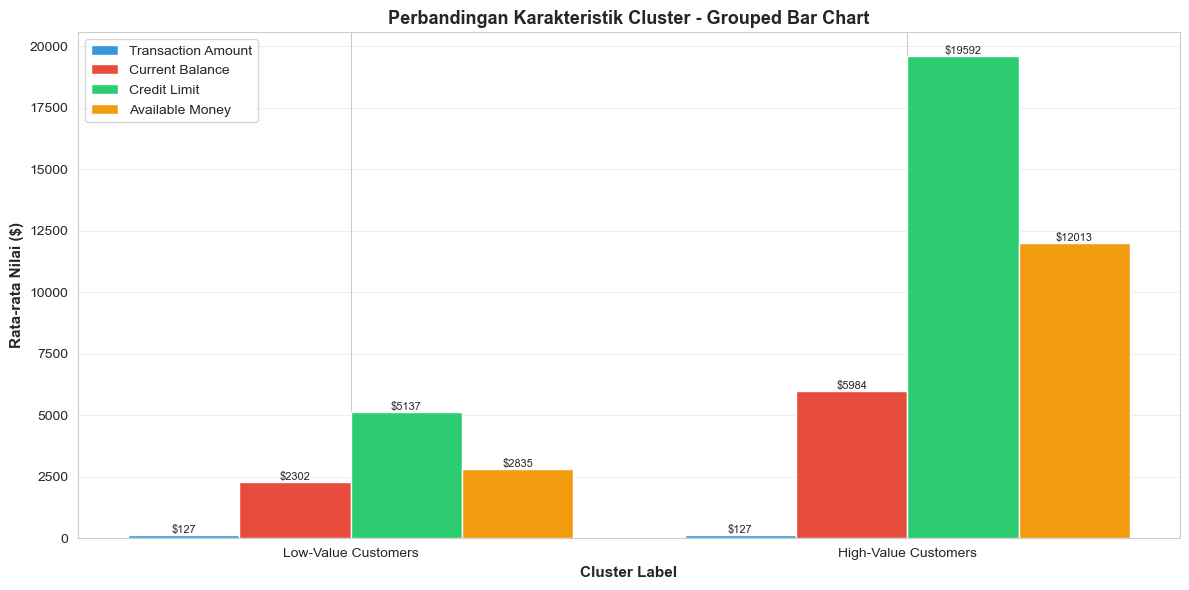

In [60]:
# Grouped Bar Chart - Perbandingan Semua Metrics
fig, ax = plt.subplots(figsize=(12, 6))

# Tentukan urutan cluster: Low-Value di kiri, High-Value di kanan
cluster_order = ["Low-Value Customers", "High-Value Customers"]
cluster_means = df_ohe.groupby("cluster_label")[["transactionAmount", "currentBalance", "creditLimit", "availableMoney"]].mean().reindex(cluster_order)

x = np.arange(len(cluster_means.index))
width = 0.2

bars1 = ax.bar(x - 1.5*width, cluster_means["transactionAmount"], width, label='Transaction Amount', color='#3498db')
bars2 = ax.bar(x - 0.5*width, cluster_means["currentBalance"], width, label='Current Balance', color='#e74c3c')
bars3 = ax.bar(x + 0.5*width, cluster_means["creditLimit"], width, label='Credit Limit', color='#2ecc71')
bars4 = ax.bar(x + 1.5*width, cluster_means["availableMoney"], width, label='Available Money', color='#f39c12')

ax.set_xlabel("Cluster Label", fontweight='bold', fontsize=11)
ax.set_ylabel("Rata-rata Nilai ($)", fontweight='bold', fontsize=11)
ax.set_title("Perbandingan Karakteristik Cluster - Grouped Bar Chart", fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(cluster_order)
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.0f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()

In [61]:
# Summary Statistics Table dengan Visualisasi
summary_stats = df_ohe.groupby("cluster_label")[["transactionAmount", "currentBalance", "creditLimit", "availableMoney"]].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('25%', lambda x: x.quantile(0.25)),
    ('75%', lambda x: x.quantile(0.75))
]).round(2)

print("\n" + "="*100)
print("RINGKASAN STATISTIK LENGKAP KARAKTERISTIK CLUSTER")
print("="*100 + "\n")

for cluster in df_ohe["cluster_label"].unique():
    print(f"\n{'─'*80}")
    print(f"CLUSTER: {cluster}")
    print(f"{'─'*80}")
    
    cluster_data = df_ohe[df_ohe["cluster_label"] == cluster]
    
    print(f"\nJumlah Customer: {len(cluster_data):,}")
    print(f"Persentase dari Total: {len(cluster_data)/len(df_ohe)*100:.2f}%\n")
    
    print("Statistik Metrik Kunci:")
    print("-" * 80)
    print(f"{'Metric':<25} {'Mean':>15} {'Median':>15} {'Std Dev':>15} {'Range':>25}")
    print("-" * 80)
    
    metrics = ["transactionAmount", "currentBalance", "creditLimit", "availableMoney"]
    metric_names = ["Transaction Amount", "Current Balance", "Credit Limit", "Available Money"]
    
    for metric, name in zip(metrics, metric_names):
        mean = cluster_data[metric].mean()
        median = cluster_data[metric].median()
        std = cluster_data[metric].std()
        min_val = cluster_data[metric].min()
        max_val = cluster_data[metric].max()
        
        print(f"{name:<25} ${mean:>14,.0f} ${median:>14,.0f} ${std:>14,.0f} ${min_val:>8,.0f} - ${max_val:>8,.0f}")

print("\n" + "="*100)



RINGKASAN STATISTIK LENGKAP KARAKTERISTIK CLUSTER


────────────────────────────────────────────────────────────────────────────────
CLUSTER: Low-Value Customers
────────────────────────────────────────────────────────────────────────────────

Jumlah Customer: 447,632
Persentase dari Total: 69.73%

Statistik Metrik Kunci:
--------------------------------------------------------------------------------
Metric                               Mean          Median         Std Dev                     Range
--------------------------------------------------------------------------------
Transaction Amount        $           127 $            86 $           121 $       0 - $     424
Current Balance           $         2,302 $         1,651 $         2,238 $       0 - $   9,766
Credit Limit              $         5,137 $         5,000 $         3,151 $     250 - $  10,000
Available Money           $         2,835 $         2,056 $         2,593 $  -1,245 - $  10,000

────────────────────────────

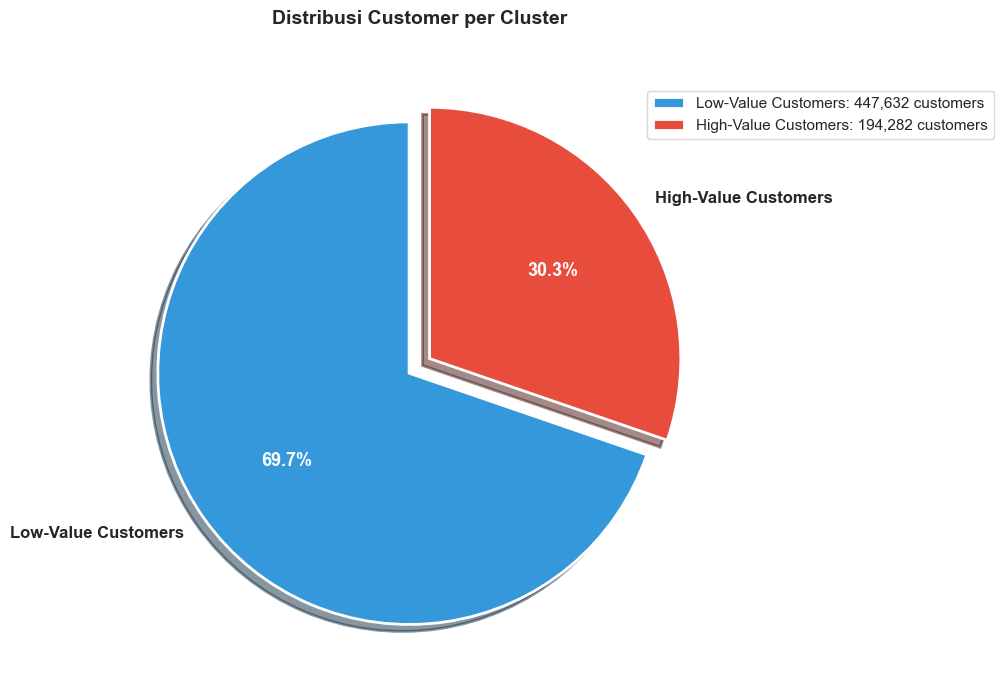

In [62]:
# 8. Pie Chart - Customer Distribution
fig, ax = plt.subplots(figsize=(10, 7))

cluster_counts = df_ohe["cluster_label"].value_counts()
colors = ['#3498db', '#e74c3c']

# Pie Chart dengan style yang lebih baik
explode = (0.05, 0.05)
wedges, texts, autotexts = ax.pie(cluster_counts.values, 
                                    labels=cluster_counts.index, 
                                    autopct='%1.1f%%',
                                    colors=colors, 
                                    explode=explode, 
                                    shadow=True, 
                                    startangle=90, 
                                    textprops={'fontsize': 12, 'fontweight': 'bold'},
                                    wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Style untuk percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')

# Add title
ax.set_title("Distribusi Customer per Cluster", fontsize=14, fontweight='bold', pad=20)

# Add legend dengan count info
legend_labels = [f"{cluster}: {count:,} customers" for cluster, count in cluster_counts.items()]
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(0.85, 0.95), fontsize=11)

plt.tight_layout()
plt.show()


C:\Users\Rian\AppData\Local\Temp\ipykernel_6060\3991441755.py:59: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rian\AppData\Local\Temp\ipykernel_6060\3991441755.py:59: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rian\AppData\Local\Temp\ipykernel_6060\3991441755.py:59: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rian\AppData\Local\Temp\ipykernel_6060\3991441755.py:59: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rian\AppData\Local\Temp\ipykernel_6060\3991441755.py:59: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rian\AppData\Local\Temp\ipykernel_6060\3991441755.py:59: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Rian\anaconda3\envs\T

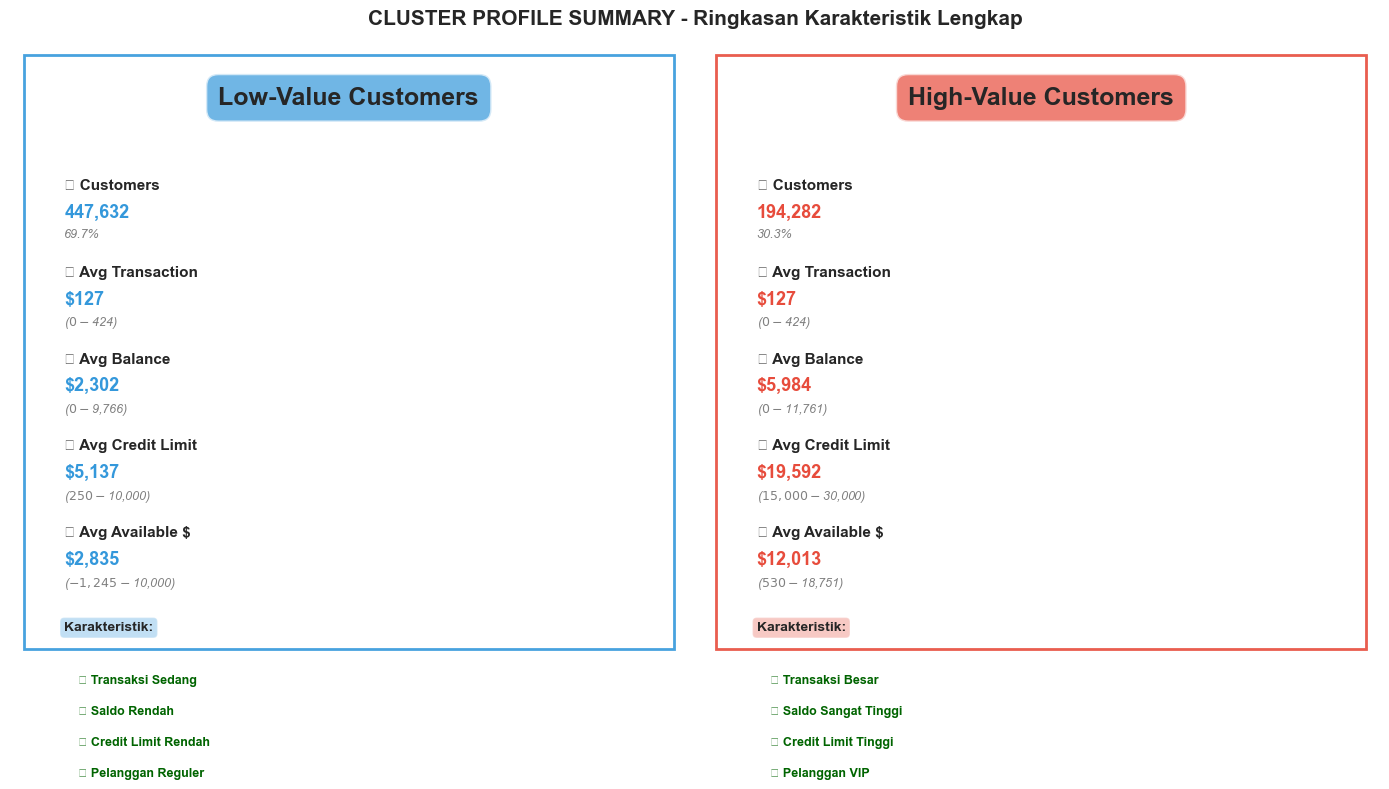

In [63]:
# Cluster Profile Summary - Infographic Style
fig = plt.figure(figsize=(14, 8))

# Tentukan urutan cluster: Low-Value di kiri, High-Value di kanan
cluster_list = ["Low-Value Customers", "High-Value Customers"]
colors_list = ['#3498db', '#e74c3c']

for idx, (cluster, color) in enumerate(zip(cluster_list, colors_list)):
    cluster_data = df_ohe[df_ohe["cluster_label"] == cluster]
    
    # Position untuk subplot
    ax = plt.subplot(1, 2, idx + 1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Background box
    rect = Rectangle((0.2, 0.2), 9.6, 9.6, linewidth=2, edgecolor=color, facecolor='white', alpha=0.9)
    ax.add_patch(rect)
    
    # Header
    ax.text(5, 9, cluster, fontsize=18, fontweight='bold', ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.7, edgecolor='white', linewidth=2))
    
    # Metrics
    y_pos = 7.8
    
    metrics_info = [
        ("👥 Customers", f"{len(cluster_data):,}", f"{len(cluster_data)/len(df_ohe)*100:.1f}%"),
        ("💳 Avg Transaction", f"${cluster_data['transactionAmount'].mean():,.0f}", f"(${cluster_data['transactionAmount'].min():,.0f} - ${cluster_data['transactionAmount'].max():,.0f})"),
        ("💰 Avg Balance", f"${cluster_data['currentBalance'].mean():,.0f}", f"(${cluster_data['currentBalance'].min():,.0f} - ${cluster_data['currentBalance'].max():,.0f})"),
        ("📊 Avg Credit Limit", f"${cluster_data['creditLimit'].mean():,.0f}", f"(${cluster_data['creditLimit'].min():,.0f} - ${cluster_data['creditLimit'].max():,.0f})"),
        ("💵 Avg Available $", f"${cluster_data['availableMoney'].mean():,.0f}", f"(${cluster_data['availableMoney'].min():,.0f} - ${cluster_data['availableMoney'].max():,.0f})"),
    ]
    
    for icon_label, main_val, range_val in metrics_info:
        ax.text(0.8, y_pos, icon_label, fontsize=11, fontweight='bold', va='top')
        ax.text(0.8, y_pos - 0.4, main_val, fontsize=13, fontweight='bold', color=color, va='top')
        ax.text(0.8, y_pos - 0.8, range_val, fontsize=9, style='italic', va='top', color='gray')
        y_pos -= 1.4
    
    # Characteristics box
    y_pos -= 0.3
    ax.text(0.8, y_pos, "Karakteristik:", fontsize=10, fontweight='bold', 
           bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.3))
    
    if cluster == "Low-Value Customers":
        characteristics = ["✓ Transaksi Sedang", "✓ Saldo Rendah", "✓ Credit Limit Rendah", "✓ Pelanggan Reguler"]
    else:
        characteristics = ["✓ Transaksi Besar", "✓ Saldo Sangat Tinggi", "✓ Credit Limit Tinggi", "✓ Pelanggan VIP"]
    
    y_pos -= 0.7
    for char in characteristics:
        ax.text(1, y_pos, char, fontsize=9, va='top', color='darkgreen', fontweight='bold')
        y_pos -= 0.5

plt.suptitle('CLUSTER PROFILE SUMMARY - Ringkasan Karakteristik Lengkap', 
            fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


## Output csv hasil clustering

In [64]:
# Simpan dataset hasil clustering ke CSV
import os

# Buat folder output jika belum ada
output_dir = '../Output_visualisasi'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Simpan dataset hasil clustering
output_file = os.path.join(output_dir, 'clustering_results.csv')
df_ohe.to_csv(output_file, index=False)
print(f"✓ Dataset hasil clustering berhasil disimpan ke: {output_file}")
print(f"✓ Total baris: {len(df_ohe)}")
print(f"✓ Total kolom: {len(df_ohe.columns)}")
print(f"\nKolom-kolom dalam dataset:")
print(df_ohe.columns.tolist())

# Tampilkan ringkasan cluster
print("\n" + "="*50)
print("RINGKASAN HASIL CLUSTERING")
print("="*50)
for cluster in df_ohe['cluster_label'].unique():
    count = len(df_ohe[df_ohe['cluster_label'] == cluster])
    percentage = (count / len(df_ohe)) * 100
    print(f"{cluster}: {count:,} customers ({percentage:.1f}%)")

✓ Dataset hasil clustering berhasil disimpan ke: ../Output_visualisasi\clustering_results.csv
✓ Total baris: 641914
✓ Total kolom: 10

Kolom-kolom dalam dataset:
['transactionAmount', 'availableMoney', 'currentBalance', 'creditLimit', 'country_CAN', 'country_MEX', 'country_PR', 'country_US', 'cluster', 'cluster_label']

RINGKASAN HASIL CLUSTERING
Low-Value Customers: 447,632 customers (69.7%)
High-Value Customers: 194,282 customers (30.3%)


In [68]:
df_ohe.to_csv("Output_data/clusteringresult.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'Output_data'